In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [28]:
(x_train, y_train ), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [29]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

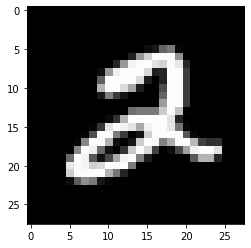

In [31]:
plt.imshow(x_train[5], cmap="gray")

In [32]:
## Preprocessing 
x_train = x_train / 255.0
x_test = x_test / 255.0

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
from tensorflow.keras.utils import plot_model
def simpleAutoEncoder():
	encoder_input = tf.keras.layers.Input(shape=(28,28,1),name="encoder_input")
	nn = tf.keras.layers.Flatten()(encoder_input)
	nn = tf.keras.layers.Dense(256,activation=tf.nn.relu)(nn)
	encoder_output = tf.keras.layers.Dense(128,activation=tf.nn.relu,name="encoder_output")(nn)

	decoder_input = tf.keras.layers.Dense(784,activation=tf.nn.relu)(encoder_output)
	decoder_output = tf.keras.layers.Reshape((28,28,1),name="decoder_output")(decoder_input)

	optimizer = tf.keras.optimizers.Adam(lr = 0.001)

	autoEncoder = tf.keras.Model(inputs=[encoder_input],outputs=[decoder_output])

	autoEncoder.compile(optimizer=optimizer,loss=tf.keras.losses.mean_squared_error,metrics=["mean_squared_error"])
	return autoEncoder

plot_model(simpleAutoEncoder())
autoencoderModel = simpleAutoEncoder()
autoencoderModel.fit(x_train,x_train,validation_split= 0.1,epochs=10,batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 107us/sample - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 2/10
54000/54000 [==============================] - 5s 98us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 3/10
54000/54000 [==============================] - 5s 96us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 4/10
54000/54000 [==============================] - 5s 97us/sample - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 5/10
54000/54000 [==============================] - 5s 96us/sample - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 6/10
54000/54000 [==============================] - 5s 97us/sample - loss: 0.0085 - mean_squared_er

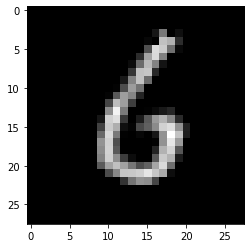

In [46]:
plt.imshow(autoencoderModel.predict(x_test[50].reshape(-1,28,28,1))[0],cmap="gray")